<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Dataset-Titanic" data-toc-modified-id="Import-Dataset-Titanic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Dataset Titanic</a></span><ul class="toc-item"><li><span><a href="#Join-datasets" data-toc-modified-id="Join-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Join datasets</a></span></li></ul></li><li><span><a href="#Analysis-exploratory-of-the-Dataset-de-treinamento" data-toc-modified-id="Analysis-exploratory-of-the-Dataset-de-treinamento-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis exploratory of the Dataset de treinamento</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#input-Age" data-toc-modified-id="input-Age-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>input Age</a></span><ul class="toc-item"><li><span><a href="#Input-Age-por-Title-e-Pclasse-,-utilzando-a-Mediana" data-toc-modified-id="Input-Age-por-Title-e-Pclasse-,-utilzando-a-Mediana-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Input Age por Title e Pclasse , utilzando a Mediana</a></span></li></ul></li><li><span><a href="#Input-Cabin" data-toc-modified-id="Input-Cabin-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Input Cabin</a></span></li><li><span><a href="#Input-Embarked" data-toc-modified-id="Input-Embarked-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Input Embarked</a></span></li></ul></li><li><span><a href="#Continuando-analise-exploratória-do-dataset-de-treinamento-após-tratamento-de-missing-values" data-toc-modified-id="Continuando-analise-exploratória-do-dataset-de-treinamento-após-tratamento-de-missing-values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Continuando analise exploratória do dataset de treinamento após tratamento de missing values</a></span></li><li><span><a href="#Feature-Engineer" data-toc-modified-id="Feature-Engineer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineer</a></span><ul class="toc-item"><li><span><a href="#Nomrmalização-Age-e-Fare-Min/Max" data-toc-modified-id="Nomrmalização-Age-e-Fare-Min/Max-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Nomrmalização Age e Fare Min/Max</a></span></li></ul></li></ul></div>

In [229]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMAGENS.
from IPython.display import Image as img

#OUTROS.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

 # Import Dataset Titanic

In [230]:
train_csv= pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [231]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
test_csv.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [233]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [234]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


## Join datasets

In [235]:
titanic=pd.concat([train_csv,test_csv],axis=0,ignore_index=True)

In [236]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [237]:
titanic_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


# Analysis exploratory of the Dataset de treinamento

In [238]:
print('Percentual de Sobreviventes x Não Sobreviventes - ',
       round(train_csv.groupby('Survived').Sex.count()/train_csv.Name.count()*100,2))

Percentual de Sobreviventes x Não Sobreviventes -  Survived
0    61.62
1    38.38
Name: Sex, dtype: float64


In [239]:
print('Missig Values:')
train_csv.isnull().sum()

Missig Values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Cabin e Age são os que mais faltam valores
* Survived são do conjunto de teste, é o que vamos prever, por isso estão nulos

Text(0.5, 1.0, 'Distribution of the field Age')

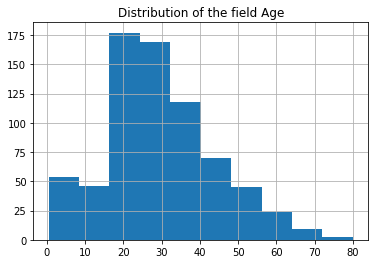

In [240]:
train_csv.Age.hist()
plt.title("Distribution of the field Age")

* there are a concentration of the age between 18 and 35 years

Text(0.5, 1.0, 'Distribution of the field Fare')

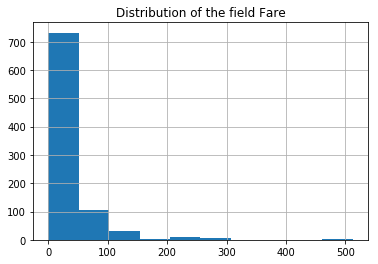

In [241]:
train_csv.Fare.hist()
plt.title("Distribution of the field Fare")

* there are a concentration of the Fare between 0 and 50

# Missing Values

 Com base no valores da feature Age e Cabin, vamos começar por elas o preenchimento dos "Missing Values"

## input Age

Analise exploratoria de Age para encontrar a melhor maneira de inputar os dados

Antes irei Criar uma nova coluna Suvived com Label- "Vivo/Morto"

In [242]:
train_csv.loc[train_csv.Survived==0,'Status_Survived']='Morto'
train_csv.loc[train_csv.Survived==1,'Status_Survived']='Vivo'

In [243]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Morto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Vivo
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Vivo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Vivo
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Morto


Text(0.5, 1.0, 'Boxplot - Age x Survived')

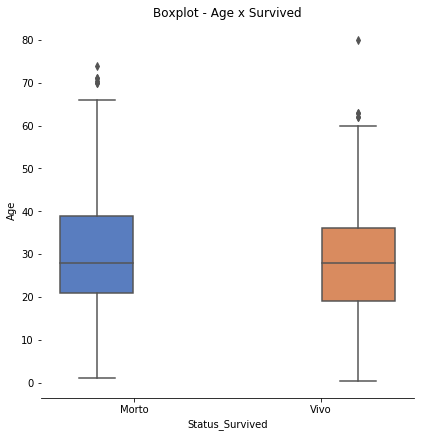

In [244]:
g = sns.factorplot(x="Status_Survived",y="Age", hue ='Status_Survived',data=train_csv,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived')

Text(0.5, 1.0, 'Boxplot - Age x Survived por Sex')

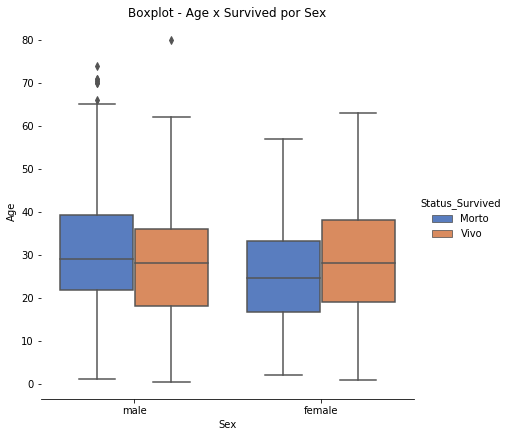

In [245]:
g = sns.factorplot(x="Sex",y="Age", hue ='Status_Survived',data=train_csv,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived por Sex')

Text(0.5, 1.0, 'Boxplot - Age x Survived por Pclass')

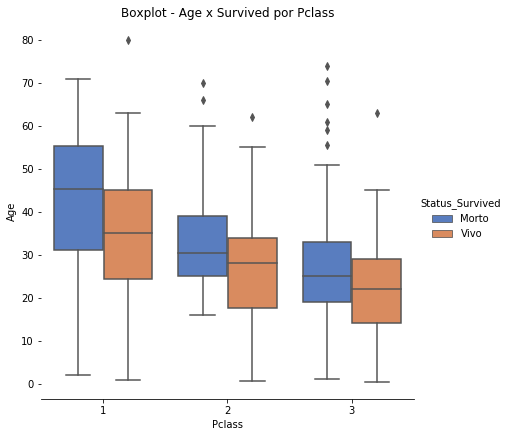

In [246]:
g = sns.factorplot(x="Pclass",y="Age", hue ='Status_Survived',data=train_csv,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived por Pclass')

* Nitidamente podemos visualizar que conforme nivel Pclass aumenta(menor classe) a idade diminui.
* Conforme visualizações acima Pclass é uma boa feature para inputar Age faltante,ou seja,por Pclass.


Text(0.5, 1.0, 'Boxplot - Age x Pclass por Sex')

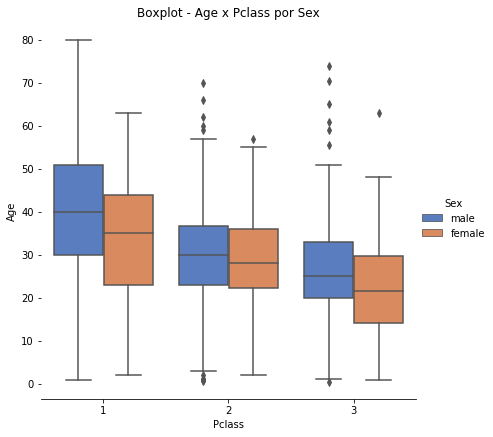

In [247]:
g = sns.factorplot(x="Pclass",y="Age", hue ='Sex',data=train_csv,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Pclass por Sex')

* O padrão se mantem mesmo por sexo, não irei utilizar Sexo para inputar idade.

***A Coluna Name também pode nos ajudar, pois nela há titulos, mr, miss, etc***

In [248]:
train_csv['Title']=[i.split(",")[1].split(".")[0].strip() for i in train_csv["Name"]]

In [249]:
train_csv.groupby('Embarked').Title.count()

Embarked
C    168
Q     77
S    644
Name: Title, dtype: int64

Text(0.5, 1.0, 'Quantidade de passageiros por Title')

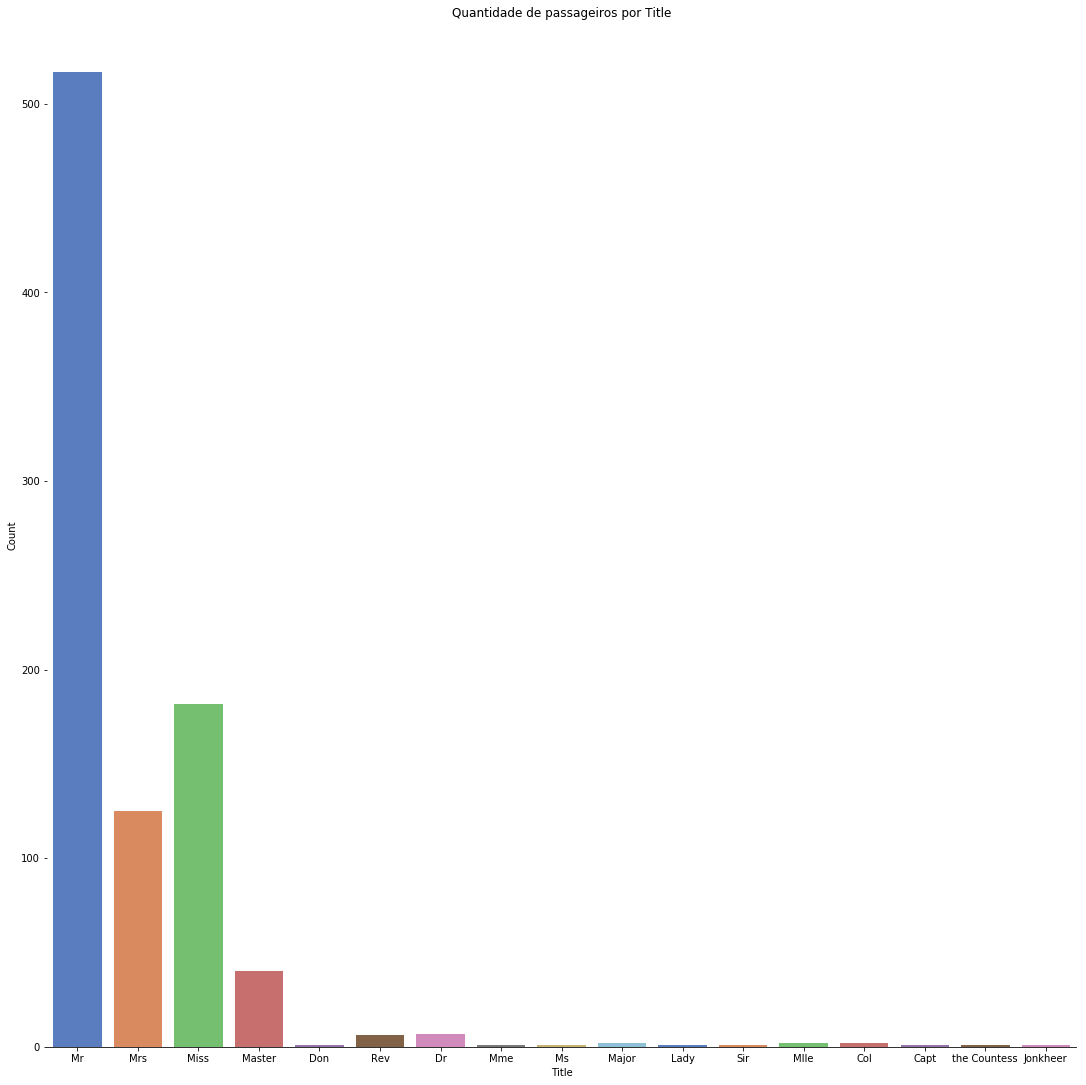

In [250]:
g = sns.factorplot("Title",
                   data=train_csv,
                   size=15, 
                   kind="count", 
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.title('Quantidade de passageiros por Title')

* Há uma padrão em Mr, Mrs, Miss e Master
* Vamos agrupar os outros que possuem poucos passageiros

In [251]:
train_csv["Title"] = train_csv["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_csv["Title"] = train_csv["Title"].replace(['Mme','Mlle','Ms'], 'Miss')

Text(0.5, 1.0, 'Quantidade de passageiros por Title')

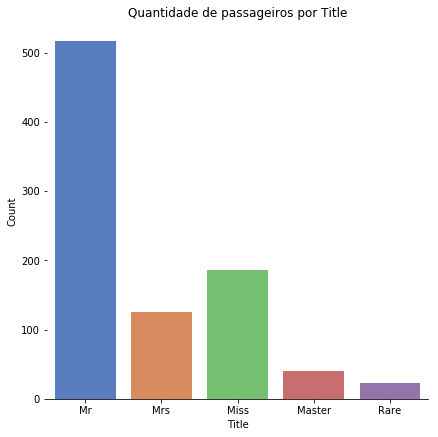

In [252]:
g = sns.factorplot("Title",
                   data=train_csv,
                   size=6, 
                   kind="count", 
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.title('Quantidade de passageiros por Title')

In [253]:
train_csv.groupby('Title').Title.count()

Title
Master     40
Miss      186
Mr        517
Mrs       125
Rare       23
Name: Title, dtype: int64

* Master - Homens Jovens
* Miss - é usado antes de sobrenomes ou nomes completos de mulheres que não são casadas. É algo próximo a “senhorita”, em português.

* Mr - Se utiliza antes de sobrenomes ou nomes completos de homens em geral, independente do seu estado civil.
* Mrs- é usado antes de sobrenomes ou nomes completos de mulheres casadas.
* Ms- é usado antes de sobrenomes ou nomes completos de mulheres em geral,independente do seu estado civil




### Input Age por Title e Pclasse , utilzando a Mediana

In [254]:
index_NaN_age = list(train_csv["Age"][train_csv["Age"].isnull()].index)

In [255]:
for i in index_NaN_age :
    age_med = train_csv["Age"].median()
    age_pred = train_csv["Age"][((train_csv['Title']  == train_csv.iloc[i]["Title"]) & 
                                 (train_csv['Pclass'] == train_csv.iloc[i]["Pclass"]))].median()
    
    
    if not np.isnan(age_pred) :
        train_csv['Age'].iloc[i] = age_pred
    else :
        train_csv['Age'].iloc[i] = age_med    

In [256]:
print('Missig Values:')
train_csv.isnull().sum()

Missig Values:


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Status_Survived      0
Title                0
dtype: int64

Text(0.5, 1.0, 'Distribution of the field Age')

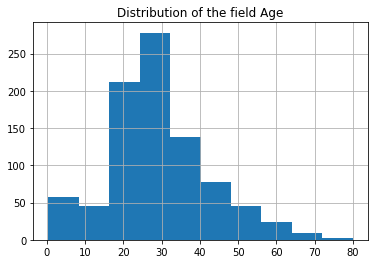

In [257]:
train_csv.Age.hist()
plt.title("Distribution of the field Age")

* A distribuição teve uma leve mudança com pico de passageiros entre 25 e 32 anos aprox.

In [258]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status_Survived,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Morto,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Vivo,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Vivo,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Vivo,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Morto,Mr


## Input Cabin

 Vamos tentar combinar informações de Ticket e Fare para tentar determinar a Cabin

In [259]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              204 non-null object
Embarked           889 non-null object
Status_Survived    891 non-null object
Title              891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 73.1+ KB


In [260]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status_Survived,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Morto,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Vivo,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Vivo,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Vivo,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Morto,Mr


In [261]:
train_csv['Feature_Cabin'] = train_csv['Ticket'].str.strip()

In [262]:
train_csv.Feature_Cabin.str.extract('([a-zA-Z]+)', expand=False).unique()

array(['A', 'PC', 'STON', nan, 'PP', 'C', 'SC', 'S', 'CA', 'SO', 'W',
       'SOTON', 'Fa', 'LINE', 'F', 'SW', 'SCO', 'P', 'WE'], dtype=object)

In [263]:
train_csv['Feature_Cabin'] = train_csv.Feature_Cabin.str.extract('([a-zA-Z])', expand=False)

In [264]:
train_csv.Feature_Cabin[train_csv.Feature_Cabin.isna()] = 'Uknow'

In [265]:
train_csv.groupby('Feature_Cabin').Feature_Cabin.count()

Feature_Cabin
A         29
C         47
F          7
L          4
P         65
S         65
Uknow    661
W         13
Name: Feature_Cabin, dtype: int64

In [266]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status_Survived,Title,Feature_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Morto,Mr,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Vivo,Mrs,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Vivo,Miss,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Vivo,Mrs,Uknow
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Morto,Mr,Uknow


In [267]:
train_csv.Feature_Cabin[train_csv.Feature_Cabin =='Uknow'] = train_csv.Cabin[train_csv.Feature_Cabin =='Uknow'].str.extract('([a-zA-Z])', expand=False)

In [268]:
train_csv.Feature_Cabin[train_csv.Feature_Cabin.isna()] = 'Uknow'

In [269]:
train_csv.groupby('Feature_Cabin').Feature_Cabin.count()

Feature_Cabin
A         41
B         31
C         91
D         26
E         23
F         18
G          2
L          4
P         65
S         65
T          1
Uknow    511
W         13
Name: Feature_Cabin, dtype: int64

In [270]:
train_csv.Cabin[train_csv.Cabin.isna()] = 'Uknow'

train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status_Survived,Title,Feature_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Uknow,S,Morto,Mr,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Vivo,Mrs,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Uknow,S,Vivo,Miss,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Vivo,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Uknow,S,Morto,Mr,Uknow


In [271]:
train_csv.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
Status_Survived    0
Title              0
Feature_Cabin      0
dtype: int64

## Input Embarked

In [272]:
mode =  train_csv.Embarked.mode()
print(mode)
train_csv.Embarked[train_csv.Embarked.isna()] = mode

0    S
dtype: object


In [273]:
train_csv.groupby('Embarked').Feature_Cabin.count()

Embarked
C    168
Q     77
S    644
Name: Feature_Cabin, dtype: int64

* Por ser apenas dua observações , foi preenchida com a moda

# Continuando analise exploratória do dataset de treinamento após tratamento de missing values

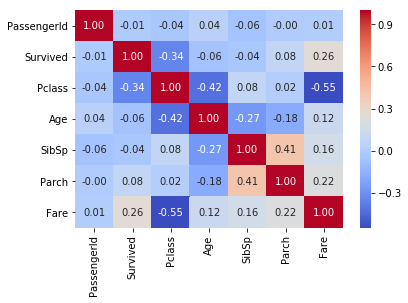

In [274]:
g = sns.heatmap(train_csv.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

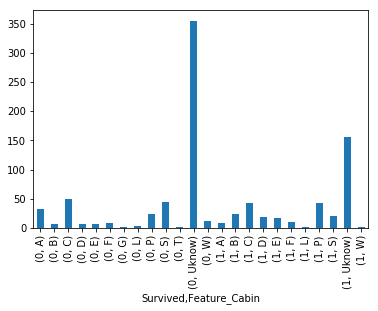

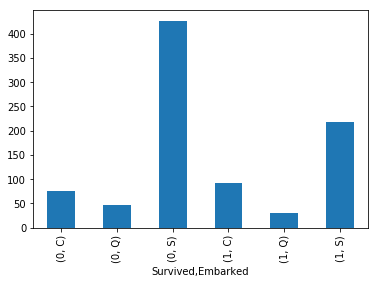

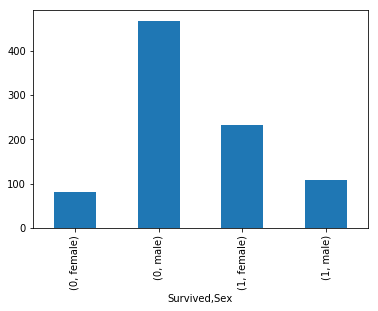

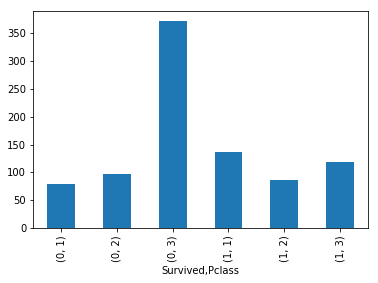

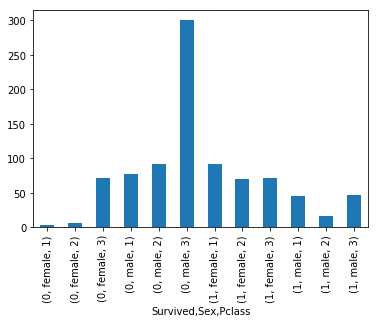

In [275]:
plt.figure()
train_csv.groupby(['Survived','Feature_Cabin']).Survived.count().plot(kind = 'bar')
plt.figure()
train_csv.groupby(['Survived','Embarked']).Survived.count().plot(kind = 'bar')
plt.figure()
train_csv.groupby(['Survived','Sex']).Survived.count().plot(kind = 'bar')
plt.figure()
train_csv.groupby(['Survived','Pclass']).Survived.count().plot(kind = 'bar')
plt.figure()
train_csv.groupby(['Survived','Sex','Pclass']).Survived.count().plot(kind = 'bar')



# Feature Engineer

## Nomrmalização Age e Fare Min/Max

In [282]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# fit and transform in one step
train_csv['Norm_Age'] = scaler.fit_transform(train_csv[['Age']])
train_csv['Norm_Fare'] = scaler.fit_transform(train_csv[['Fare']])



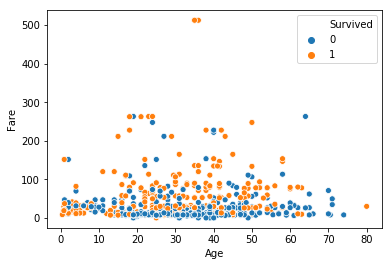

In [293]:
ax = sns.scatterplot(x="Age", y="Fare", hue='Survived', data=train_csv)

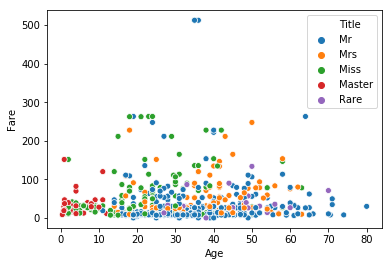

In [308]:
ax = sns.scatterplot(x="Age", y="Fare", hue='Title', data=train_csv)

In [317]:
print(train_csv.Age[train_csv.Title=='Master'].max())
print('Mr  min',train_csv.Age[train_csv.Title=='Mr'].min())
print('Rare  min',train_csv.Age[train_csv.Title=='Rare'].min())
print('Rare  max',train_csv.Age[train_csv.Title=='Rare'].max())

12.0
Mr  min 11.0
Rare  min 23.0
Rare  max 70.0


In [322]:
train_csv.loc[train_csv.Age  <=  12,'Faixa_Age'] = 'Criança'

train_csv.loc[(train_csv.Age >= 13) & (train_csv.Age < 22),'Faixa_Age']  = 'Jovem'

train_csv.loc[(train_csv.Age >= 23) & (train_csv.Age < 40),'Faixa_Age']  = 'Adulto'

train_csv.loc[(train_csv.Age >= 41) & (train_csv.Age < 60),'Faixa_Age']  = 'Experiente'

train_csv.loc[train_csv.Age  >= 60 ,'Faixa_Age'] = 'Senior'

In [324]:
train_csv.groupby('Faixa_Age').Survived.count()

Faixa_Age
Adulto        431
Criança        73
Experiente    131
Jovem         168
Senior         26
Name: Survived, dtype: int64

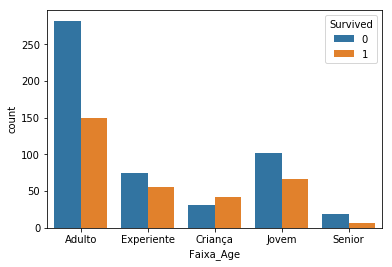

In [338]:
p = sns.countplot(data=train_csv,
                  x = 'Faixa_Age',
                  hue = 'Survived')